<a href="https://colab.research.google.com/github/mvlier/topapprox/blob/main/Paper%20examples/Reproducing_paper_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BEWARE:** Some cells might show an error when running for the first time. In that case running that cell one more time should resolve the problem.

# Installing necessary packages

In [1]:
!pip install git+https://github.com/mvlier/topapprox@main
!pip install -U -q cripser persim plotly kaleido

  Cloning https://github.com/mvlier/topapprox (to revision main) to /tmp/pip-req-build-b_ltl6xv
  Running command git clone --filter=blob:none --quiet https://github.com/mvlier/topapprox /tmp/pip-req-build-b_ltl6xv
  Resolved https://github.com/mvlier/topapprox to commit d4bdac1e80a33254927c71c96859de4563e78a2a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for topapprox: filename=topapprox-0.0.2-py3-none-any.whl size=9397 sha256=cf8350dd73e1ef7da2dfa1c892a0f8770f4b94942135c7a95ffc119e8555bbc2
  Stored in directory: /tmp/pip-ephem-wheel-cache-sy4ssjvn/wheels/49/17/71/71c98f055e9b71cd32cab64370e89376d750f95bf7f991d9c2
Successfully built topapprox
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.0 MB/s eta 0:00:00


In [1]:
import topapprox as ta
import cripser
import persim
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import sys,os

import warnings
warnings.filterwarnings("ignore")

In [36]:
import os
os.makedirs("image", exist_ok=True)

# Example V.1 (1D signal)

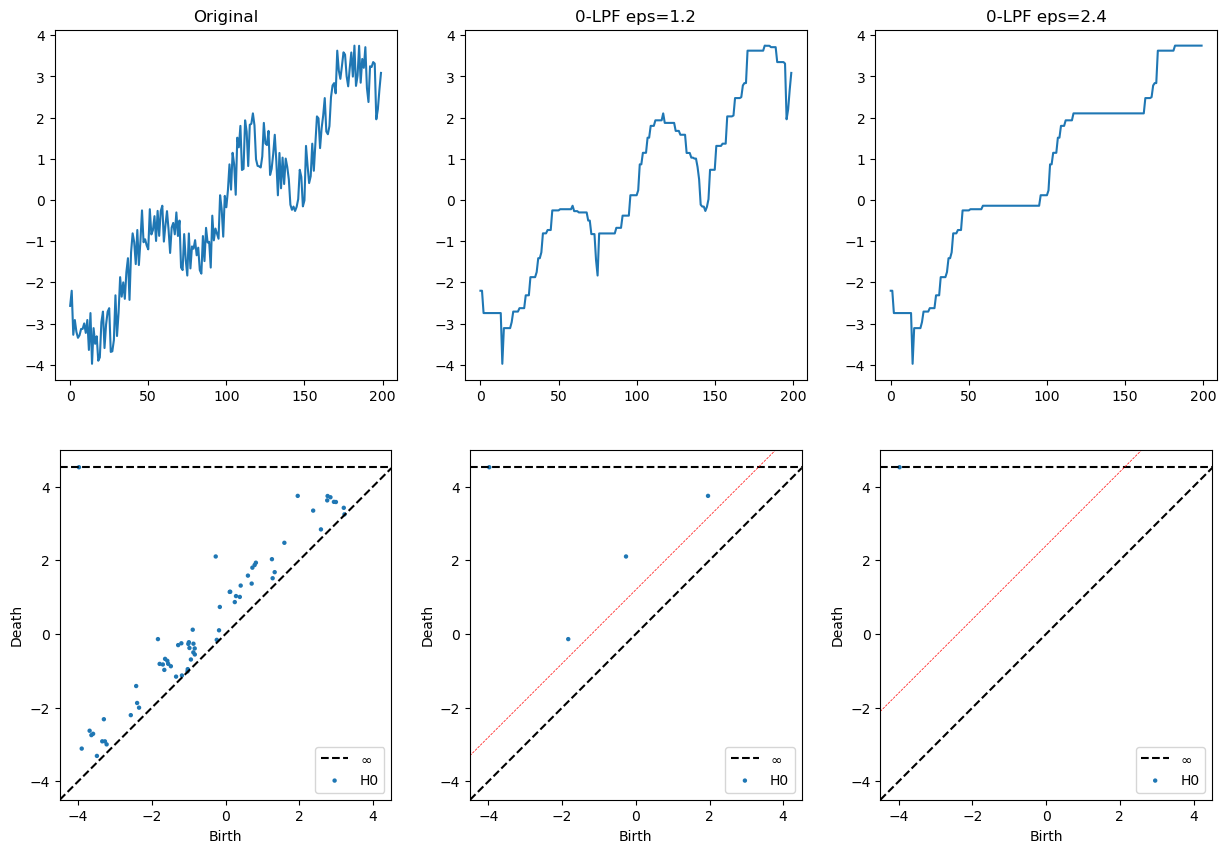

In [37]:
##################
# Creating Signal#
##################

m=200 # resolution
noise = 0.7 # noise level
s=1.2 ## life threshold = simplification strength

# create a sample signal
y, x = np.mgrid[0:1, -10:10:m*1j]
img = np.sin(x)+0.3*x
img_original = img.copy()
np.random.seed(1)
img += np.random.uniform(-noise,noise,img.shape)


#################################
# Computing and plotting results#
#################################

fig, axs = plt.subplots(2,3,figsize=(15,10))

# original signal and persistence
axs[0,0].plot(img.ravel())
uf = ta.TopologicalFilterImage(img)
# try:
#     newimg = uf.low_pers_filter(epsilon=0)
# except:
#     pass
newimg = uf.low_pers_filter(epsilon=0)
PD = cripser.computePH(newimg)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD,labels=["H0"],size=10,ax=axs[1,0], xy_range = [-4.5,4.5,-4.5,5])
#axs[1,0].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
axs[0,0].set_title(f'Original')


s=1.2
# lpf_0 with eps = 1.2
img2 = uf.low_pers_filter(epsilon=s)
axs[0,1].plot(img2.ravel(), label="Filtered function")
#axs[0,1].plot(img_original.ravel(), label="Trend")
#axs[0,1].legend(loc='lower right')
uf2 = ta.TopologicalFilterImage(img2)
newimg = uf.low_pers_filter(epsilon=s)
PD = cripser.computePH(newimg)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD,labels=["H0"],size=10,ax=axs[1,1], xy_range = [-4.5,4.5,-4.5,5])
axs[1,1].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
axs[0,1].set_title(f'0-LPF eps={s}')


s = 2.4
# lpf_0 with eps = 2.4
img2 = uf.low_pers_filter(epsilon=s)
axs[0,2].plot(img2.ravel())
uf2 = ta.TopologicalFilterImage(img2)
newimg = uf.low_pers_filter(epsilon=s)
PD = cripser.computePH(newimg)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD,labels=["H0"],size=10,ax=axs[1,2],xy_range = [-4.5,4.5,-4.5,5] )
axs[1,2].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
axs[0,2].set_title(f'0-LPF eps={s}')

# plt.savefig('1D-toy-example.pdf')
plt.savefig("image/1D-toy-example.png", dpi=300, bbox_inches="tight")

# Example V.2 (2D signal)

In [38]:
import topapprox as ta
import cripser
import persim
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import sys,os

import warnings
warnings.filterwarnings("ignore")

In [39]:
# Defining the scalar field to be used in the example
def scalar_field(x,y):
    np.random.seed(0)
    M = 300
    a = np.random.rand(M, 2)*8 + 1
    c = np.random.rand(M)*0.3 + 0.1
    b = 100
    m = c.size
    result = 0
    for i in range(m):
        result += 1 / (b*(x - a[i][0])**2 + b*(y - a[i][1])**2 + c[i])

    a = np.random.rand(M, 2)*8 + 1
    c = np.random.rand(M)*0.3 + 0.1
    m = c.size
    result2 = 0
    for i in range(m):
        result2 += 1 / (b*(x - a[i][0])**2 + b*(y - a[i][1])**2 + c[i])

    Z = result - result2
    Z2 = (x-5)**2 + 3*(y-5)**2
    Z = Z + Z2

    return Z

x = np.linspace(0, 10, 500)
y = np.linspace(0, 10, 500)
X, Y = np.meshgrid(x, y)
surface = scalar_field(X, Y)

In [42]:
# 3D plot settings for better visualization
def plot3D(M, *, with_titles=False, title=None, vmin=None, vmax=None, save_as=None):
    x = np.linspace(0, 500, M.shape[1])  # X-coordinates
    y = np.linspace(0, 500, M.shape[0])  # Y-coordinates
    X, Y = np.meshgrid(x, y)  # Create the meshgrid for X and Y

    # Plot the matrix M in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Use plot_surface to plot the matrix M
    ax.plot_surface(X, Y, M, cmap='viridis', vmin=vmin, vmax=vmax)

    # Change the perspective
    ax.view_init(elev=10, azim=20)


    # ax.set_ylim(-5,5)
    ax.set_zlim(-10,25)
    # ax.set_xlim(-10,2)

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    # x = np.linspace(0, 500, M.shape[1])  # X-coordinates
    # y = np.linspace(0, 500, M.shape[0])  # Y-coordinates
    # X, Y = np.meshgrid(x, y)  # Create the meshgrid for X and Y
    # X, Y = np.meshgrid(x, y)  # Create the meshgrid for X and Y
    ax.plot_surface(X[:, -10:], Y[:, -10:], M[:, -10:], color='red', vmin=vmin, vmax=vmax)
    ax.plot_surface(X[-5:, :], Y[-5:, :], M[-5:, :], color='blue', vmin=vmin, vmax=vmax)
    ax.plot_surface(X[:, :10], Y[:, :10], M[:, :10]+0.5, color='red', vmin=vmin, vmax=vmax)
    ax.plot_surface(X[:5, :], Y[:5, :], M[:5, :]+0.5, color='blue', vmin=vmin, vmax=vmax)

    # ax.grid(False)
    # ax.axis('off')

    if with_titles:
        plt.title(title, fontsize = 26)

    #plt.show()
    #plt.savefig('shekel-simplified.pdf', bbox_inches='tight')
    if save_as is not None:
        plt.savefig(save_as, dpi=300, bbox_inches="tight")

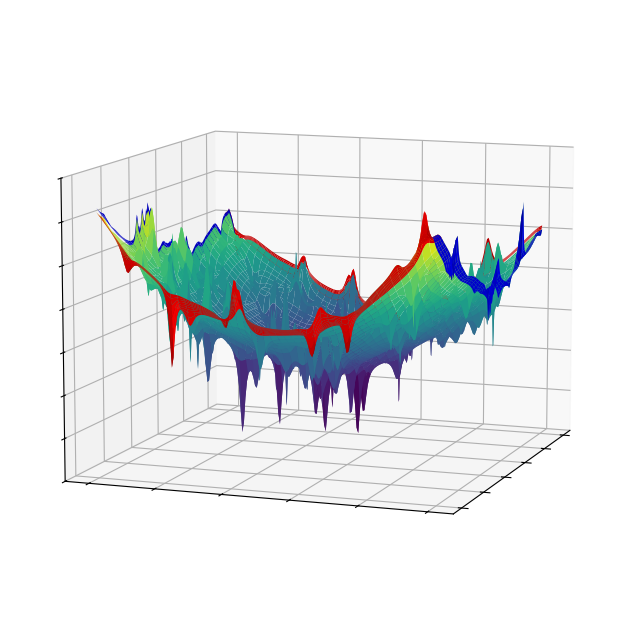

In [43]:
plot3D(surface[150:350, 150:400], save_as="image/shekel-original.png")

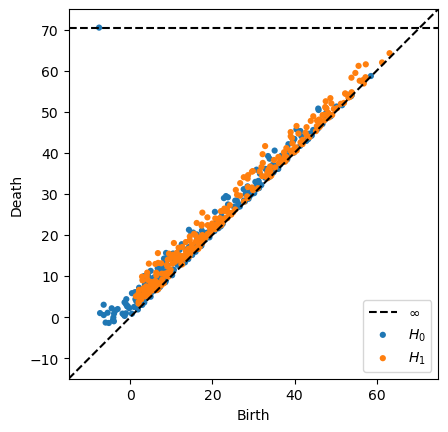

In [79]:
PD = cripser.computePH(surface)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD, xy_range=[-15,75,-15,75])
plt.savefig("image/shekel-original-diagram.png", bbox_inches="tight", dpi=300)

In [44]:
# Filtering persitent 0-homology
tf3D_0 = ta.TopologicalFilterImage(surface)
surface_0 = tf3D_0.low_pers_filter(1e+5) #Filtering all finite persistence

#Filtering persitent 1-homology
tf3D_1 = ta.TopologicalFilterImage(surface_0, dual=True)
surface_filtered = tf3D_1.low_pers_filter(1e+5)

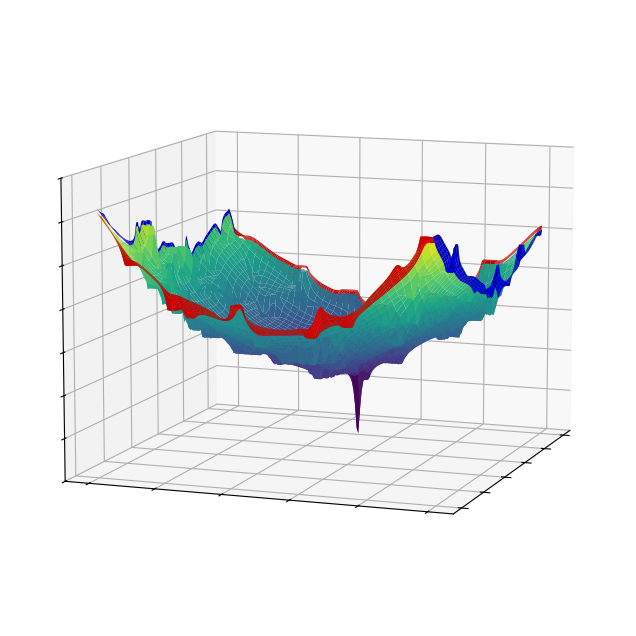

In [45]:
plot3D(surface_filtered[150:350, 150:400], save_as="image/shekel-simplified.png")

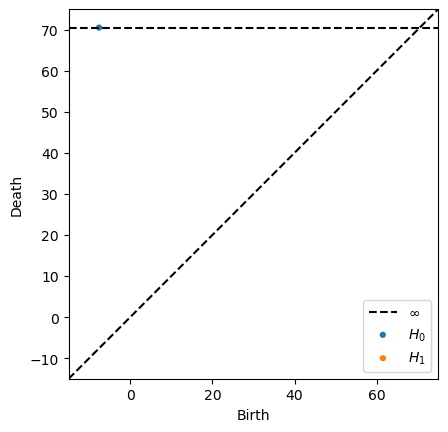

In [81]:
PD = cripser.computePH(surface_filtered)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD, xy_range=[-15,75,-15,75])
plt.savefig("image/shekel-simplified-diagram.png", bbox_inches="tight", dpi=300)

In [ ]:
PD = cripser.computePH(surface)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD)
plt.savefig("image/shekel-original-diagram.png", bbox_inches="tight", dpi=300)

# Example V.3 (Natural image)

In [34]:
import topapprox as ta
import cripser
import persim
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import sys,os

import warnings
warnings.filterwarnings("ignore")

In [47]:
# download image
download_url = "https://github.com/mvlier/topapprox/raw/main/Paper%20examples/pagoda.npy"
fn = "pagoda.npy"
if not os.path.isfile(fn):
    urllib.request.urlretrieve(download_url, fn)

img = np.load(fn)

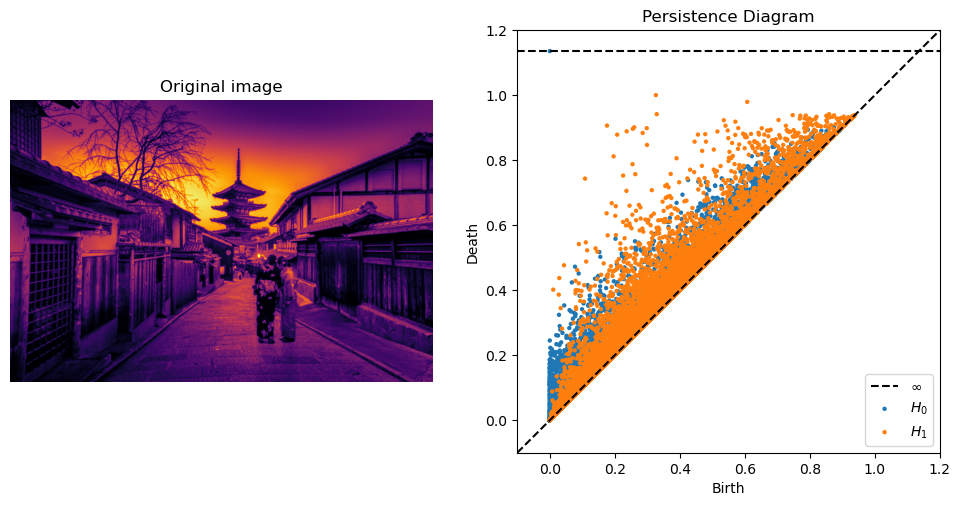

In [48]:
# Plotting original image with its persistence diagram
fig, ax = plt.subplots(1,2, figsize=(12,24))
ax[0].imshow(img, cmap='inferno')
ax[0].axis('off')
ax[0].title.set_text('Original image')
PD = cripser.computePH(img)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD,size=10,ax=ax[1],xy_range = [-0.1,1.2,-0.1,1.2])
ax[1].title.set_text('Persistence Diagram')
plt.savefig("image/pagoda-original.png", bbox_inches="tight", dpi=300)


In [49]:
# Filtering image by a threshold of 0.0704
e1 = 0.0704

# Filtering persitent 0-homology
tf_imga_0 = ta.TopologicalFilterImage(img)
img_1 = tf_imga_0.low_pers_filter(e1)

#Filtering persitent 1-homology
tf_imga_1 = ta.TopologicalFilterImage(img_1, dual=True)
imga = tf_imga_1.low_pers_filter(e1)


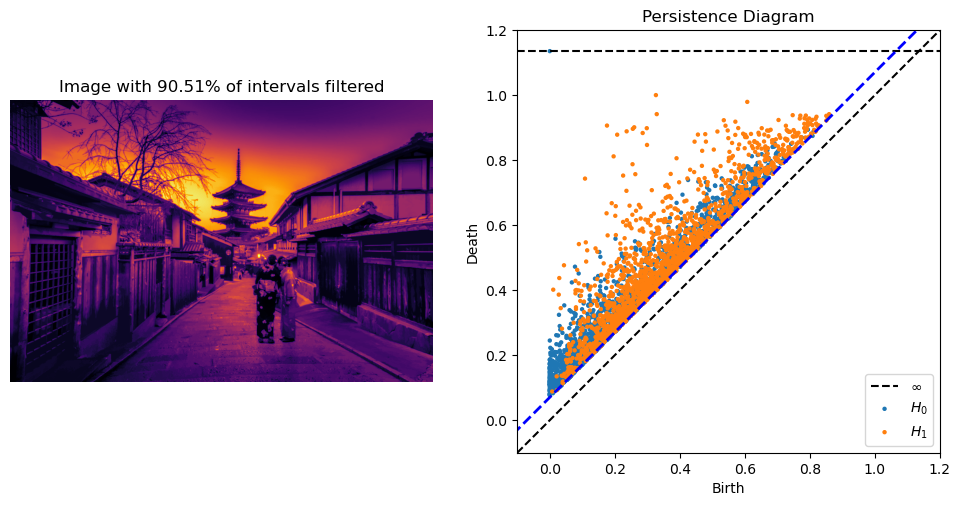

In [50]:
# Plotting original image with its persistence diagram
fig, ax = plt.subplots(1,2, figsize=(12,24))
ax[0].imshow(imga, cmap='inferno')
ax[0].axis('off')
ax[0].title.set_text('Image with 90.51% of intervals filtered')
PDa = cripser.computePH(imga)
PDa = [PDa[PDa[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PDa,size=10,ax=ax[1],xy_range = [-0.1,1.2,-0.1,1.2])
ax[1].title.set_text('Persistence Diagram')
ax[1].plot([-100,100], [-100+e1,100+e1], '--', linewidth=2.0, c="b")
plt.savefig("image/pagoda-9050.png", bbox_inches="tight", dpi=300)

In [51]:
percentage_filtered_a = (1 - (PDa[0].size + PDa[1].size) / (PD[0].size + PD[1].size)) * 100
print(f'The exact percentage of filtered intervals in the case above is {percentage_filtered_a}')

The exact percentage of filtered intervals in the case above is 90.50826554087708


In [52]:
# Filtering image by a threshold of 0.3022
e2 = 0.3022

# Filtering persitent 0-homology
tf_imgb_0 = ta.TopologicalFilterImage(img)
imgb_1 = tf_imgb_0.low_pers_filter(e2)

#Filtering persitent 1-homology
tf_imgb_1 = ta.TopologicalFilterImage(imgb_1, dual=True)
imgb = tf_imgb_1.low_pers_filter(e2)

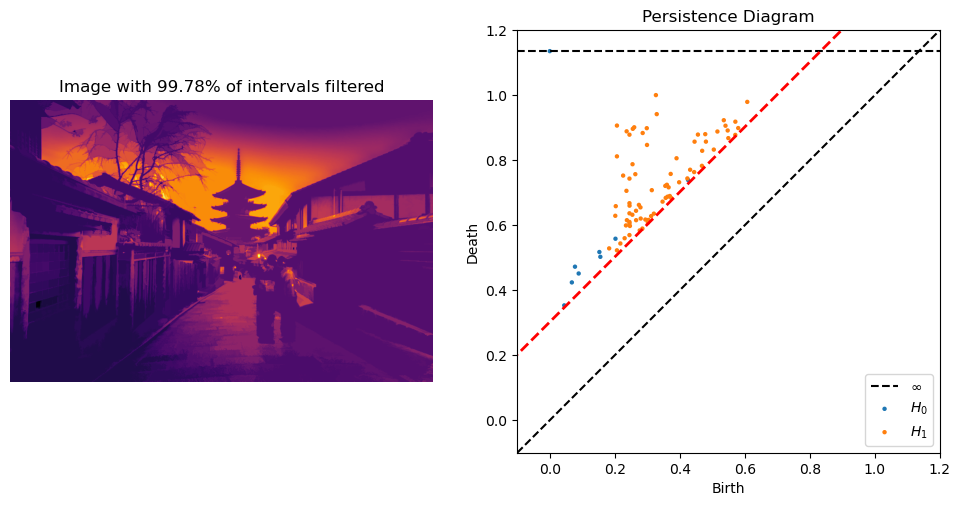

In [53]:
# Plotting original image with its persistence diagram
fig, ax = plt.subplots(1,2, figsize=(12,24))
ax[0].imshow(imgb, cmap='inferno')
ax[0].axis('off')
ax[0].title.set_text('Image with 99.78% of intervals filtered')
PDb = cripser.computePH(imgb)
PDb = [PDb[PDb[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PDb, size=10,ax=ax[1],xy_range = [-0.1,1.2,-0.1,1.2])
ax[1].title.set_text('Persistence Diagram')
ax[1].plot([-100,100], [-100+e2,100+e2], '--', linewidth=2.0, c="r")
plt.savefig("image/pagoda-9980.png", bbox_inches="tight", dpi=300)

In [17]:
percentage_filtered_b = (1 - (PDb[0].size + PDb[1].size) / (PD[0].size + PD[1].size)) * 100
print(f'The exact percentage of filtered intervals in the case above is {percentage_filtered_b}')

The exact percentage of filtered intervals in the case above is 99.79840144202262


# Example V.4 (Signal over a mesh)

In [18]:
import topapprox as ta
import cripser
import persim
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import sys,os

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go
import csv

In [54]:
# load mesh data
download_url = "https://github.com/mvlier/topapprox/raw/main/Paper%20examples/mesh_vertices.npy"
fn = 'mesh_vertices.npy'
if not os.path.isfile(fn):
    urllib.request.urlretrieve(download_url, fn)
V = np.load(fn)

download_url = "https://github.com/mvlier/topapprox/raw/main/Paper%20examples/mesh_faces.npy"
fn = 'mesh_faces.npy'
if not os.path.isfile(fn):
    urllib.request.urlretrieve(download_url, fn)
F = np.load(fn).astype(int)

In [55]:
# load signal data
download_url = "https://github.com/mvlier/topapprox/raw/main/Paper%20examples/func.csv"
fn = 'func.csv'
if not os.path.isfile(fn):
    urllib.request.urlretrieve(download_url, fn)

# Open the CSV file
with open(fn, newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    func_ = list(csvreader)


# Eliminate header and change format, from list to dictionary
func_ = func_[1:]
func_dict = {int(x[0]):float(x[1]) for x in func_}
func_array = np.array(sorted(func_dict.items()))[:,1]

cmin = min(func_dict.values())
cmax = max(func_dict.values())


In [58]:
def plot_mesh(v, f, func, cmin, cmax):
    data = go.Mesh3d(
            #Vertices
            x=v[0],
            y=v[1],
            z=v[2],
            #colorbar_title='z',
            colorscale=[[0, '#440154'],
                        [0.24, '#481a6c'],
                        [0.35, '#3b528b'],
                        [0.5, '#21918c'],
                        [0.65, '#5ec962'],
                        [0.8, '#d2e21b'],
                        [1, '#fde725']],
            #colorscale = 'bluered',
            cmin = cmin,
            cmax = cmax,
            # Intensity of each vertex, which will be interpolated and color-coded
            intensity=func,
            #Faces
            i=f[0],
            j=f[1],
            k=f[2],
            name='y',
            showscale=True,
            colorbar=dict(
                x=0.85,  # Adjust the color bar position closer to the plot
                thickness=20,
                len = 0.8
            )
        )

    fig = go.Figure(data = [data])

    a = 1.17

    fig.update_layout(
        scene_camera=dict(
            eye=dict(x=-1*a, y=-1*a, z=0.5*a)
        )
    )

    fig.update_layout(
        scene=dict(
            xaxis=dict(showticklabels=False, title=''),
            yaxis=dict(showticklabels=False, title=''),
            zaxis=dict(showticklabels=False, title=''),
        )
    )

    fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0)  # Remove all outer whitespace
)

    fig.update_layout(scene = dict(xaxis = dict(showgrid = False),
                                    yaxis = dict(showgrid = False),
                                    zaxis = dict(showgrid = False)
                ))
    fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False )

    return fig

Original scalar field over mesh

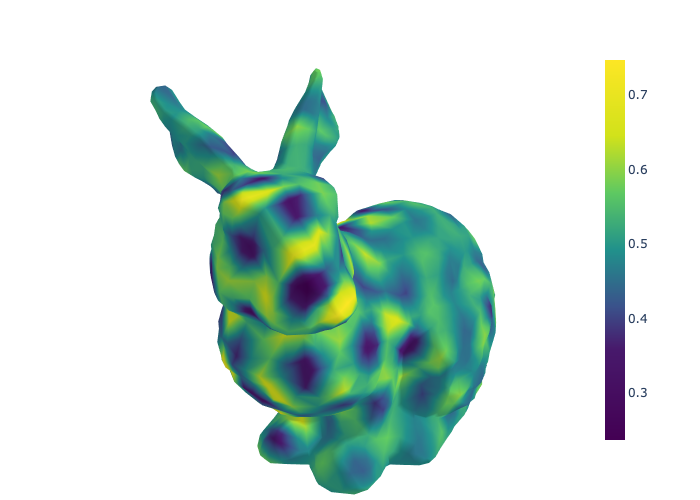

In [70]:
import kaleido
fig = plot_mesh(V, F, func_array, cmin, cmax)
# This produces a png image
fig.write_image("image/mesh-original.png", width=900, height=900)
fig.show(renderer="png")
# This produces an interactive plot
fig.show()

In [61]:
faces = np.array([[F[0][i],F[1][i],F[2][i]] for i in range(F[0].size)])

In [62]:
signal = np.array([value for key, value in func_dict.items()])

In [63]:
eps = 0.2
tfg = ta.TopologicalFilterGraph()
tfg.compute_gwf(faces, [], signal)
filtered_0 = tfg.low_pers_filter(epsilon = eps)
# filtered_0 = tfg.get_modified_filtration()

In [64]:
# Function_0 = sorted([[int(k),float(v)] for k,v in filtered_0.items()])
# Function_0 = np.array([x[1] for x in Function_0])

Filtered Scalar Fields - after filtering only persistent 0-homology below the threshold eps=0.2


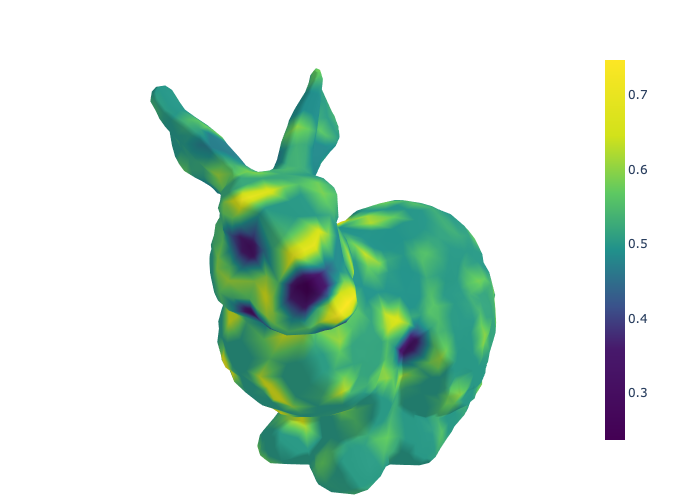

In [65]:
fig2 = plot_mesh(V, F, filtered_0, cmin, cmax)
# This produces an png image
fig2.write_image("image/mesh-0LPF.png", width=900, height=900)
fig2.show(renderer="png")
# This produces an interactive plot
fig2.show()


In [66]:
eps = 0.2
tfgd = ta.TopologicalFilterGraph(dual=True)
tfgd.compute_gwf(faces, [], filtered_0)
filtered_01 = tfgd.low_pers_filter(epsilon = eps)
# _ = tfgd.compute(epsilon = eps, dual=True)=True
# filtered_01 = tfgd.get_modified_filtration()

In [67]:
# Function_01 = sorted([[int(k),float(v)] for k,v in filtered_01.items()])
# Function_01 = np.array([x[1] for x in Function_01])

Filtered Scalar Fields - after filtering both persistent 0- and 1-homology below the threshold eps=0.2


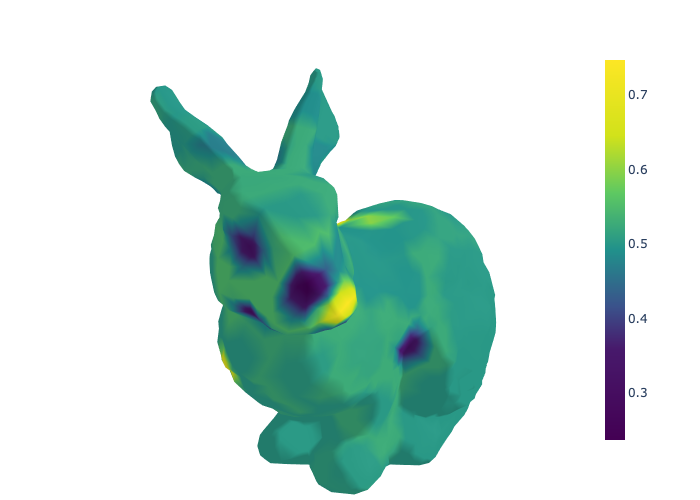

In [69]:
fig3 = plot_mesh(V, F, filtered_01, cmin, cmax)
# This produces a png image
fig3.write_image("image/mesh-0LPF-1LPF.png", width=900, height=900)
fig3.show(renderer="png")
# This produces an interactive plot
fig3.show()

### Plotting persistence diagrams for the three scalar fields over the mesh

In [71]:
# Import function for computing persistence diagram of a graph with faces
from topapprox.persistence import get_PD_gwf

In [72]:
PD_original = get_PD_gwf(faces, [], signal)
PD_0 = get_PD_gwf(faces, [], filtered_0)
PD_01 = get_PD_gwf(faces, [], filtered_01)

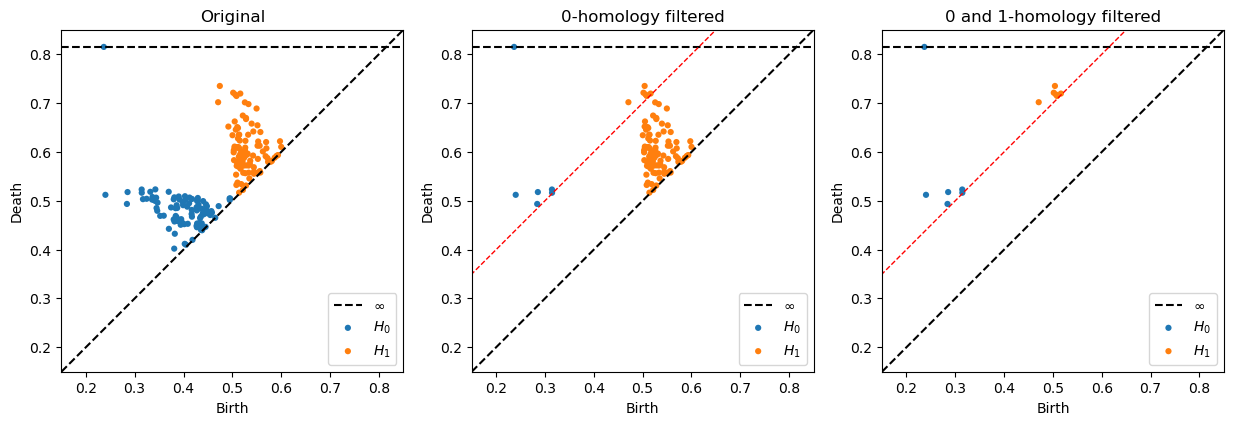

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
persim.plot_diagrams(PD_original, ax=ax[0], xy_range = [0.15, 0.85, 0.15, 0.85])
persim.plot_diagrams(PD_0, ax=ax[1], xy_range = [0.15, 0.85, 0.15, 0.85])
persim.plot_diagrams(PD_01, ax=ax[2], xy_range = [0.15, 0.85, 0.15, 0.85])
ax[1].plot([-100,100], [-100+eps,100+eps], '--', linewidth=1.0, c="r")
ax[2].plot([-100,100], [-100+eps,100+eps], '--', linewidth=1.0, c="r")
ax[0].title.set_text('Original')
ax[1].title.set_text('0-homology filtered')
ax[2].title.set_text('0 and 1-homology filtered')
plt.savefig("image/mesh-diagrams.png", bbox_inches="tight", dpi=300)